<br>

<center><img src="https://s3.us-east-2.amazonaws.com/brainder/2015/tastingtea/tasting_tea_550.jpg"></center>



<br>

# **<center> The lady tasting tea experiment</center>**

<br>
 
***
    
*__<div style="text-align: right"> Author: Denis Sarf </div>__*
    
<br>

### Table of Contents

***
* [1. Introduction](#Introduction)

* [2. Question 1](#Question_1)
* [2.1 Bonus](#Bonus)
* [3. Question 2](#Question_2)
* [4. Question 3](#Question_3)
* [References](#References)

## 1. Introduction <a class="anchor" id="Introduction"></a>$^{[1]}$
***

<h5>The now famous story is that in an otherwise unremarkable summer afternoon in Cambridge in the 1920’s, a group of friends eventually discussed about the claims made by one of the presents about her abilities on discriminating whether milk was poured first or last when preparing a cup of tea with milk. One of the presents was Ronald Fisher, and the story, along with a detailed description of how to conduct a simple experiment to test the claimed ability, and how to obtain an exact solution, was presented at length in the Chapter 2 of his book The Design of Experiments, a few lines of which are quoted below:</h5>

<div align="center" class="alert alert-block alert-success">A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup. We will consider the problem of designing an experiment by means of which this assertion can be tested. […] [It] consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of that the test will consist, namely, that she will be asked to taste eight cups, that these shall be four of each kind […]</div>
<div style="text-align: center"><b>Fisher, 1935</b></div>

<h5>The lady in question (Muriel Bristol) claimed to be able to tell whether the tea or the milk was added first to a cup. Fisher proposed to give her eight cups, four of each variety, in random order. One could then ask what the probability was for her getting the specific number of cups she identified correct, but just by chance.</h5>

<h5>Fisher's description is less than 10 pages in length and is notable for its simplicity and completeness regarding terminology, calculations and design of the experiment.The example is loosely based on an event in Fisher's life. The test used was Fisher's exact test.</h5>

***

<h5>There are</h5> 
<br>
$${8 \choose 4} = \frac{8!}{4!(8-4)!} = 70$$<br>
<br>
<h5>distinct possible orderings of these cups, and by telling the subject in advance that there are four cups of each type, this guarantees that the answer will include four of each.</h5>

<br>

<center><img src="https://s3.us-east-2.amazonaws.com/brainder/2015/tastingtea/tea_cups.png"></center>


<br>

## 2. Question 1 <a class="anchor" id="Question_1"></a>

***

<div class="alert alert-info"><h5> Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.</h5></div>

_We need to import Python modules, that can access code from another module by importing a file/function using import._

In [1]:
# Math module.
import math

_The math.comb() method returns the number of ways picking k unordered outcomes from n possibilities, without repetition, also known as combinations.$^{[2]}$_

**Parameters:**

_**n**_: The positive integers of items from which to choose

_**k**_: The positive integers of items to choose

_The following is adapted from stackoverflow$^{[3]}$_


In [2]:
# Number of ways of selecting 4 cups from 8.
math.comb(8, 4)

70

Possible outcomes of the **"lady tasting tea"** experiment  to get all *4* cups correct from *8* cups

In [3]:
1.0 / math.comb(8, 4)

0.014285714285714285

In [4]:
# Number of ways of selecting 5 cups from 10.
math.comb(10, 5)

252

Possible outcomes of the **"lady tasting tea"** experiment  to get all *5* cups correct from *10* cups

In [5]:
# Probability of randomly selecting correct 5 cups is:
1.0 / math.comb(10, 5)

0.003968253968253968

_As a result of the experiment was performed with 10 cups, 5 with milk and 5 with tea, then the probability of a correct random selection is much less than 1%._

Possible outcomes of the **"lady tasting tea"** experiment  to get all *6* cups correct from *12* cups

In [6]:
math.comb(12, 4)

495

In [7]:
math.comb(12, 8)

495

We can notice that there were 12 cups in total, 4 with milk in the first and 8 with tea in the first - or vice versa, the probability is the same.


### 2.1 *Bonus:*  <a class="anchor" id="Bonus"></a>
***
<div class="alert alert-info"><h5>How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?</h5></div>

In [8]:
# Number of ways of selecting 4 cups from 8.
math.comb(8, 4)

70

In [9]:
1.0 / math.comb(8, 4)

0.014285714285714285

In [10]:
math.comb(5, 4)

5

In [11]:
1.0 / math.comb(4, 3)

0.25

In [12]:
math.comb(5, 1)

5

## 3. Question 2 <a class="anchor" id="Question_2"></a>
***

<div class="alert alert-info"><h5>Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.</h5></div>

**Perform a Fisher exact test on a 2x2 contingency table.**


### `scipy.stats.fisher_exact`

`scipy.stats.fisher_exact(table, alternative='two-sided')`
<a href="https://github.com/scipy/scipy/blob/v1.9.2/scipy/stats/_stats_py.py#L4492-L4723" style="color: #1bde58">
 [source]</a>


Fisher exact test on a 2x2 contingency table.


|| Tea | Milk |
| :- | -: | :-: |
| Selected Tea | 4 | 0|
| Selected Milk | 0 | 4|


The null hypothesis is that the true odds ratio of the populations underlying the observations is one, and the observations were sampled from these populations under a condition: the marginals of the resulting table must equal those of the observed table. The statistic returned is the unconditional maximum likelihood estimate of the odds ratio, and the p-value is the probability under the null hypothesis of obtaining a table at least as extreme as the one that was actually observed. There are other possible choices of statistic and two-sided p-value definition associated with Fisher’s exact test.

**Parameters:**

_**table**_: array_like of ints - A 2x2 contingency table with non-negative integers.

_**alternative**_: {‘two-sided’, ‘less’, ‘greater’}, optional
- Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):

 - ‘two-sided’: the odds ratio of the underlying population is not one

 - ‘less’: the odds ratio of the underlying population is less than one

 - ‘greater’: the odds ratio of the underlying population is greater than one

In [13]:
# import statistical methods
import scipy.stats as ss

In [14]:
# Perform a Fisher exact test 
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

In [15]:
# Create a probability table above given the lady tasting tea experiment
ss.fisher_exact([[4, 0], [0, 4]])

(inf, 0.028571428571428536)

#### Table based on an experiment with a lady tasting tea
|| Tea | Milk |
| :- | -: | :-: |
| Selected Tea | 4 | 0|
| Selected Milk | 0 | 4|

In [16]:
# Create a probability table above given the lady tasting tea experiment
table = ([[4,0], [0,4]])

In [17]:
# Perform a Fisher exact test 
oddsratio, p_value = ss.fisher_exact(table)
p_value

0.028571428571428536

When running the Fisher Exact Test:`ss.fisher_exact(table)` without specifying the second `alternative` parameter, it goes by default as `two-sided`, but in our case, we have to use it as `greater`. Because the odds ratio of the underlying population is greater than one.

Let's try to include the second parameter: `alternative` as `greater` to get the correct result.

In [18]:
# Perform a Fisher exact test with adding the second parameter alternative='greater': the odds ratio of the underlying population is greater than one
oddsratio, p_value = ss.fisher_exact(table, alternative='greater')
p_value

0.014285714285714268

In [19]:
print(f'The probability of the lady-tasting tea experiment for 4 out of 8 cups that had milk added first is:{p_value}')

The probability of the lady-tasting tea experiment for 4 out of 8 cups that had milk added first is:0.014285714285714268


## 4. Question 3 <a class="anchor" id="Question_3"></a>
***
<div class="alert alert-info"><h5>Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved</h5></div>

**The T-test for the means of two independent samples of scores.**

### `scipy.stats.ttest_ind`

`scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)`
<a href="https://github.com/scipy/scipy/blob/v1.9.2/scipy/stats/_stats_py.py#L6314-L6597" style="color: #1bde58">
 [source]</a>
 
 
 This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.
 
 **Parameters:**

_**a, b**_: array_like 
- The arrays must have the same shape, except in the dimension corresponding to axis (the first, by default).

_**axis**_: int or None, optional
- Axis along which to compute test. If None, compute over the whole arrays, a, and b.

_**equal_var**_: bool, optional
- If True (default), perform a standard independent 2 sample test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variance.

_**nan_policy**_: {‘propagate’, ‘raise’, ‘omit’}, optional
- Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):

 - ‘propagate’: returns nan

 - ‘raise’: throws an error

 - ‘omit’: performs the calculations ignoring nan values

 The ‘omit’ option is not currently available for permutation tests or one-sided asympyotic tests.
 
_**permutations**_: non-negative int, np.inf, or None (default), optional
- If 0 or None (default), use the t-distribution to calculate p-values. Otherwise, permutations is the number of random permutations that will be used to estimate p-values using a permutation test. If permutations equals or exceeds the number of distinct partitions of the pooled data, an exact test is performed instead (i.e. each distinct partition is used exactly once). See Notes for details.

_**random_state**_: {None, int, numpy.random.Generator, numpy.random.RandomState}, optional
- If seed is None (or np.random), the numpy.random.RandomState singleton is used. If seed is an int, a new RandomState instance is used, seeded with seed. If seed is already a Generator or RandomState instance then that instance is used. Pseudorandom number generator state used to generate permutations (used only when permutations is not None).

_**alternative**_: {‘two-sided’, ‘less’, ‘greater’}, optional
- Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):

 - ‘two-sided’: the means of the distributions underlying the samples are unequal.

 - ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.

 - ‘greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.
 
_**trim**_: float, optional
- If nonzero, performs a trimmed (Yuen’s) t-test. Defines the fraction of elements to be trimmed from each end of the input samples. If 0 (default), no elements will be trimmed from either side. The number of trimmed elements from each tail is the floor of the trim times the number of elements. Valid range is [0, .5)

_**statistic**_: float or array
- The calculated t-statistic.

_**pvalue**_: float or array
- The p-value.

#### Examples

The `scipy.stats` module specializes in random variables and probability distributions.It implements more than 80 continuous distributions and 10 discrete distributions. In what follows we learn how to use the basic functionality. For the more detailed reference manual I refer to $^{[4]}$

In [20]:
# import the package scipy.stats
from scipy import stats

_NumPy_, which stands for _Numerical Python_, is a scientific computing library built on top of the _Python_ programming language.
The most common way to import _NumPy_ into your _Python_ environment is to use the following syntax: `import numpy as np`
The as `np` portion of the code then tells _Python_ to give _NumPy_ the alias of `np`. This allows you to use _NumPy_ functions by simply typing `np.function_name` rather than numpy

In [21]:
# import the numpy package
import numpy as np

The `import seaborn` portion of the code tells Python to bring the Seaborn library into the current environment.
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures$^{[12]}$.

In [22]:
# import the seaborn package
import seaborn as sns

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like _MATLAB_. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes$^{[13]}$.

In [23]:
import matplotlib.pyplot as plt

`default_rng` is the recommended constructor for the random number class Generator. For the more detailed reference manual I refer to $^{[5]}$

In [24]:
# use default_rng to generate a random float
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7F65BCDEA130

The location `loc` keyword specifies the mean. The scale `scale` keyword specifies the standard deviation. For the more detailed reference manual I refer to $^{[6]}$
The `random_state` None or int or `np.random.RandomState` instance, optional If int or `RandomState`, use it for drawing the random variates. If None, rely on `self.random_state`. Default is None $^{[7]}$

In [25]:
# Generate random numbers
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

In [26]:
# output of rvs1
rvs1

array([-1.41174622e+01,  9.61822363e+00,  3.65750958e+00,  1.48424115e+01,
        1.87411151e+01, -3.31098087e+00,  1.62326257e+01, -3.22868842e+00,
       -8.93810318e-01, -1.22019121e+01, -2.63843240e+00,  2.90109851e+00,
       -7.79694807e-01, -1.00895731e+01, -4.69824751e+00,  2.53737402e+00,
        2.70900638e+01, -2.56424185e+00,  1.41709288e+01,  2.20444667e+01,
       -1.42406059e+01,  9.13366326e+00,  1.47316284e+01,  1.71329911e+01,
        1.33346154e+01,  7.95543024e-01,  1.66834514e+00,  2.14647371e+01,
       -2.18103030e+01,  9.69347550e-01,  2.91141216e+01,  1.89358009e+01,
        1.38494841e+01,  1.27750937e+01, -4.31719402e+00,  3.21916571e+01,
        6.73572077e+00,  1.46235863e+01,  3.55111039e+00,  6.49172749e+00,
        6.79263701e+00, -1.47083692e+01, -1.25167276e+01,  7.11178568e-01,
        1.30581337e+01,  7.69770547e+00,  6.32062157e+00, -7.32670533e+00,
       -6.16052197e+00,  1.33372164e+01,  1.04604361e+00,  4.01654607e+00,
        5.09933165e+00,  

`sns.kdeplot` is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether. Using the _Python Seaborn_ module, we can build the `sns.kdeplot` with various functionality added to it$^{[14]}$.

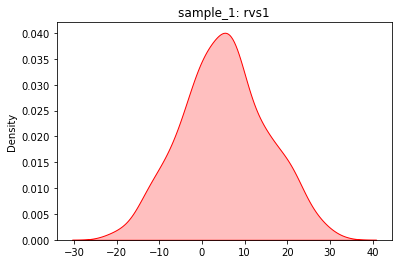

In [27]:
sns.kdeplot(rvs1, color='red', shade=True)
# give a title of the plot
plt.title("sample_1: rvs1")

# change figure size
plt.rcParams['figure.figsize'] = [20, 7]

# show the plot
plt.show()

In [28]:
# output of rvs2
rvs2

array([-1.36352118e-01,  1.68781717e+01,  6.03822396e-01,  7.21264631e+00,
       -7.29256374e-01,  1.01066444e+01,  1.95625515e+01,  8.24229223e+00,
        3.20326758e+00,  5.56688997e+00,  1.23992697e+01, -2.07166110e+01,
       -1.25549998e+00, -4.40926155e+00, -9.78097756e+00,  7.52574174e+00,
       -5.35677739e+00,  7.86244238e-01,  3.90247152e+00,  9.82643590e+00,
        2.67878351e+00,  2.51095108e+00, -8.01062132e-01,  9.25941639e-02,
        1.41534486e+01,  2.12611617e+01,  1.36133759e-01,  1.40737830e+01,
        1.46072845e+00, -2.09230520e+01,  4.04201037e+00, -2.64640575e-02,
        4.83913314e-01,  1.38396306e+01,  1.26551908e+01, -3.20241756e+00,
        1.45778527e+01,  1.59651472e+01,  1.84331755e+01,  2.49086803e+01,
        5.73034517e+00,  1.99894831e+01,  2.29449077e+00,  8.15083867e+00,
        1.23406875e+01,  1.38432756e+01, -4.67836825e+00,  1.70128627e+01,
        2.69458376e+00, -6.91142198e+00,  5.98174959e+00,  6.66215871e+00,
        4.80425321e+00,  

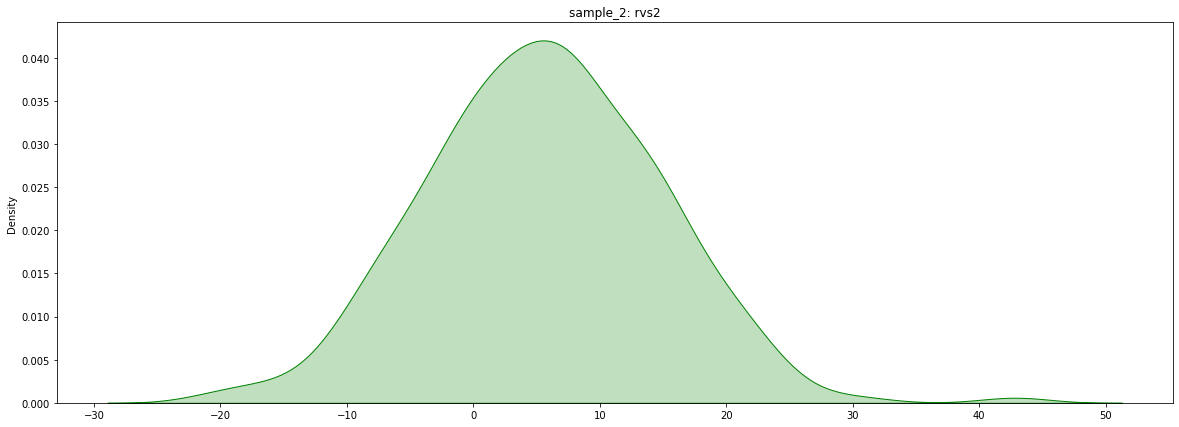

In [29]:
sns.kdeplot(rvs2, color='green', shade=True)
# give a title of the plot
plt.title("sample_2: rvs2")
# show the plot
plt.show()

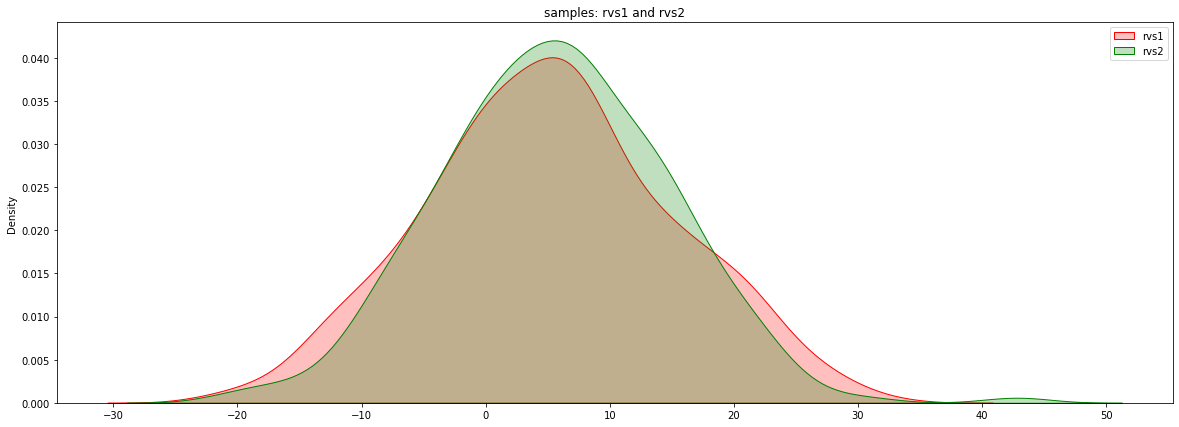

In [30]:
sns.kdeplot(rvs1, color='red', label="rvs1", shade=True)
sns.kdeplot(rvs2, color='green', label="rvs2", shade=True)
# give a title of the plot
plt.title("samples: rvs1 and rvs2")
# show the legend
plt.legend()
# show the plot
plt.show()

`ttest_ind(a, b)`

Calculate the T-test for the two samples `rvs1` and `rvs2` (a, b).
This is a null hypothesis test that two independent samples that have the same mean (expected) values. This test runs only with two parameters; two arrays. And returns two results, the first is `statistic` which calculated t-statistic, and the second is `p_value`. A `p_value` from a t-test is the probability that the results from your sample data occurred by chance. P-values are from **0%** to **100%** and are usually written as a decimal (for example, a p-value of **5%** is **0.05**). Low p-values indicate your data did not occur by chance. For the more detailed reference manual I refer to $^{[8]}$

_**a**_: an array of sample 1

_**b**_: an array of sample 2

In [31]:
# T-test for the two random arrays samples(rvs1, rvs2)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.6606061599702722, pvalue=0.5090173668616524)

Calculate the T-test for the two samples `rvs1` and `rvs2` and the `equal_var` parameter as false. 

`equal_var`: if _True_, perform a standard independent 2-sample t-test that assumes equal population variances. If _False_, perform Welch’s t-test, which does not assume equal population variances. This is _True_ by default.

In [32]:
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=-0.6606061599702722, pvalue=0.5090183157265795)

In [33]:
# Generate random numbers for 'rvs3' value with different scale; scale=20
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
rvs3

array([-1.00346136e+01,  8.00143617e-01,  2.39628946e+00,  1.98367020e+01,
        3.28449614e+00,  5.07352810e+00,  9.06459129e+00,  5.92560088e+00,
       -2.76403860e+01, -1.70530379e+01,  1.10715135e+01,  1.43505801e+00,
        1.71554871e+01,  1.71280914e+01,  2.60896904e+01,  2.60735869e+00,
        1.43872008e+01, -5.28213339e+00, -8.02111979e+00, -2.08753837e+01,
        1.90697059e+01,  1.68083024e+01, -2.60292364e+01,  1.61308187e+01,
       -7.29939209e+00,  1.07362324e+01,  3.02494873e+01, -1.49177658e+01,
        5.92286469e-01, -2.33480664e+01,  1.71819634e+01,  6.23388524e+01,
        1.27883071e+01,  2.14828807e+01,  2.04502721e-01,  4.46743373e+00,
        4.63135042e+01, -2.00182504e+00,  2.02515487e+01,  2.14818051e+01,
        1.88078680e+01,  1.01392661e+01,  3.19890288e+01,  2.42750892e+01,
        9.93700506e+00, -9.33457094e+00,  4.28465044e+00, -5.54707753e+00,
        1.04003297e+01, -3.38233761e-01, -4.78319431e+00,  1.56135309e+01,
        3.52817122e+01,  

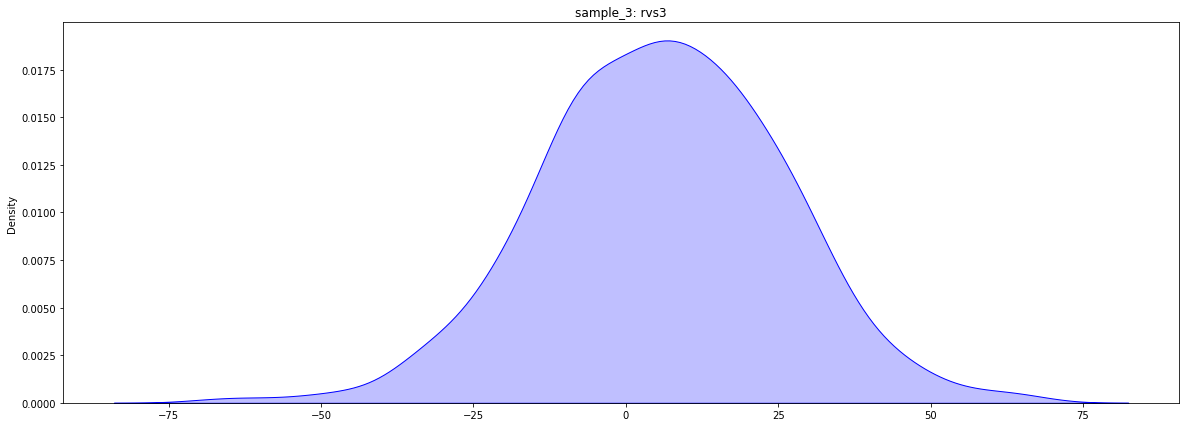

In [34]:
sns.kdeplot(rvs3, color='blue', shade=True)
# give a title of the plot
plt.title("sample_3: rvs3")
# show the plot
plt.show()

In [35]:
# Calculate the T-test for the two samples 'rvs1' and 'rvs3'.
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-0.6777791776771267, pvalue=0.49806881404514536)

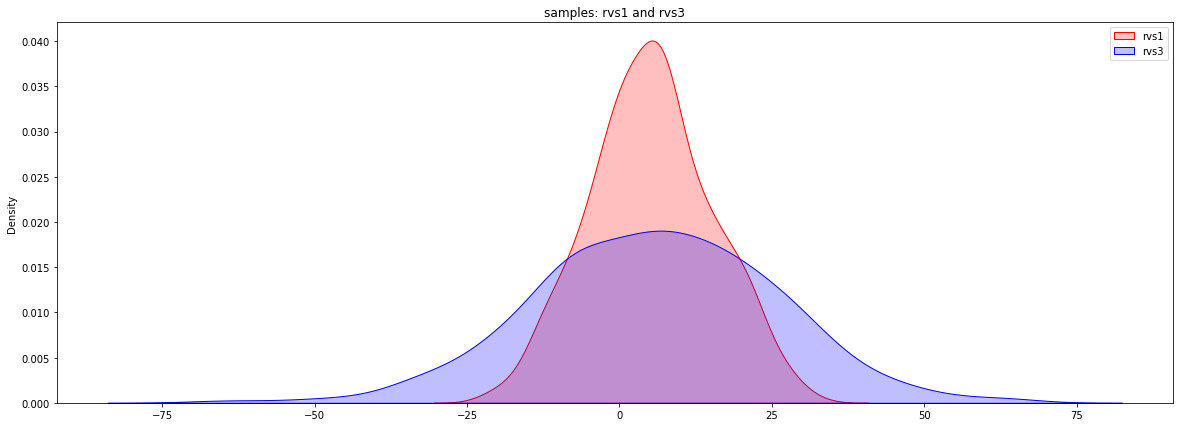

In [36]:
sns.kdeplot(rvs1, color='red', label="rvs1", shade=True)
sns.kdeplot(rvs3, color='blue', label="rvs3", shade=True)
# give a title of the plot
plt.title("samples: rvs1 and rvs3")
# show the legend
plt.legend()
# show the plot
plt.show()

In [37]:
# Calculate the T-test for the two samples 'rvs1' and 'rvs3' and with the 'equal_var' parameter as false.
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-0.6777791776771267, pvalue=0.49812421921102223)

In [38]:
# Create rvs4-value with different 'scale'(20) and 'size'(100). 
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
rvs4

array([-24.88781702,   3.65321923,  12.87062836,  22.63397573,
        -9.00973851, -21.91273675,   0.37942308, -28.24529466,
        25.20407967, -24.99341101,  12.54276132,   0.25657904,
        16.47756782,  31.34173096,  -6.01069531, -20.99862858,
       -14.23892719,  29.15056059,   8.18537546,  29.28367777,
         0.93337113,  37.85286295,   1.19061089, -26.84215309,
       -14.0843595 ,  15.88816857,  -4.23595859,   2.74451783,
        11.24363747, -12.48701184, -21.24437639,  45.43428818,
         8.96420649, -10.5420931 , -12.09229122,  41.41353154,
         1.61748167,  -3.60415597,   0.69659412,  24.76804117,
       -32.59788772,  31.21871292, -18.0392699 ,  14.22041926,
        11.37686005,  23.91578895,  12.3232268 ,  -9.27230676,
        29.76788736,  16.45422851, -13.34204378,  22.16606786,
         3.78210256,   9.92866192,  21.16868407,  -5.27800544,
        28.72680037,   8.41999875,  22.57212062,  29.52076195,
         6.32444032,   4.34610845,  19.80634203,  45.56

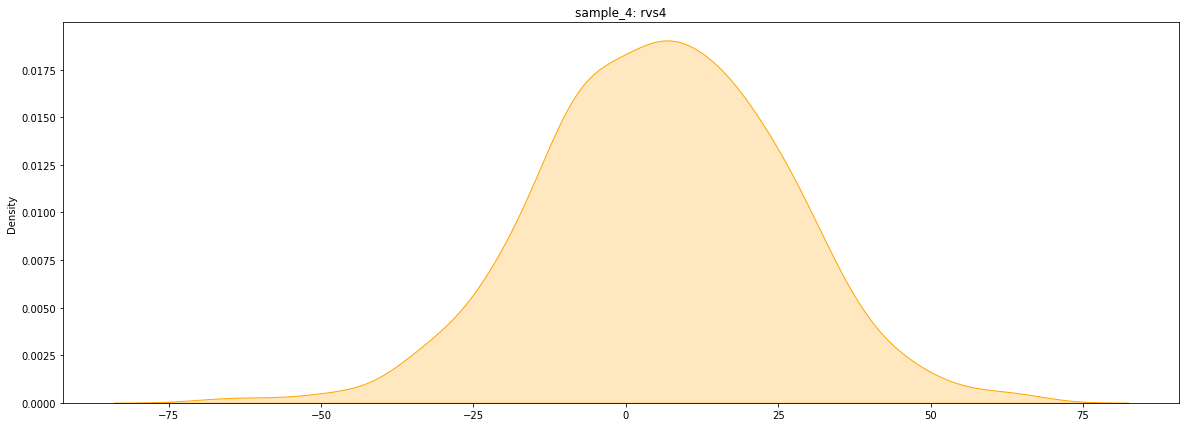

In [39]:
sns.kdeplot(rvs3, color='orange', shade=True)
# give a title of the plot
plt.title("sample_4: rvs4")
# show the plot
plt.show()

In [40]:
# Calculate the T-test for the two samples 'rvs1' and 'rvs4' where samples have different scales and sizes.
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=-1.6689348695793895, pvalue=0.09565369829193907)

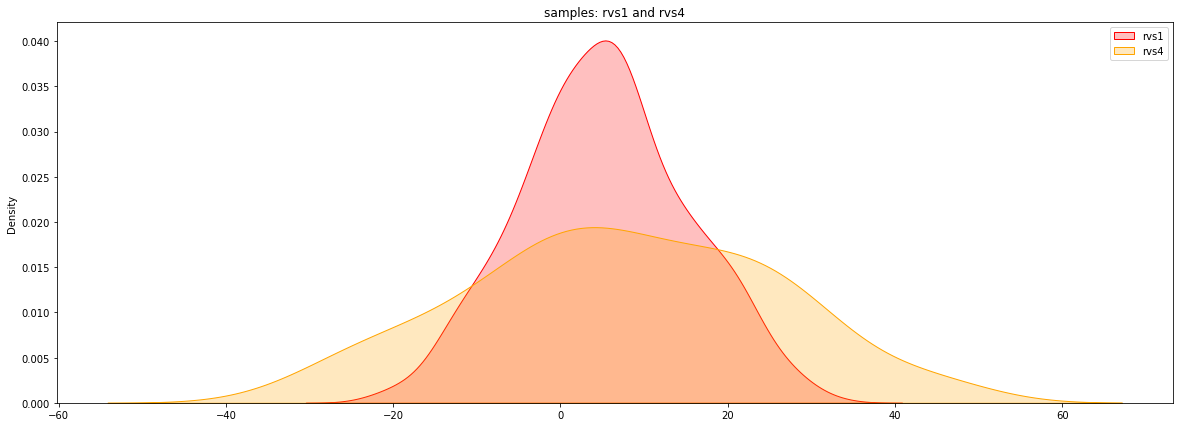

In [41]:
sns.kdeplot(rvs1, color='red', label="rvs1", shade=True)
sns.kdeplot(rvs4, color='orange', label="rvs4", shade=True)
# give a title of the plot
plt.title("samples: rvs1 and rvs4")
# show the legend
plt.legend()
# show the plot
plt.show()

In [42]:
# Calculate the T-test for the two samples 'rvs1' and 'rvs4' and with the 'equal_var' parameter as false.
stats.ttest_ind(rvs1, rvs4, equal_var=False)

Ttest_indResult(statistic=-1.1525585431348768, pvalue=0.25155769466299915)

In [43]:
# Create rvs5-value with different "location parameter: represents the mean" loc=8. 
# For the more detailed reference manual I refer to[9]
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
rvs5

array([  0.56074635, -19.89277737,  36.57238329,   0.66401181,
        10.01426521,  -4.36295379, -13.78007448,  34.75960319,
         7.41021181,   6.61465172,  -3.88995258,   9.10263734,
       -22.30106053, -22.67273664,  19.21290568, -24.65687878,
         5.3258301 ,  16.29080259,  11.30833602,  30.40289163,
        -2.28967334,  -7.61530909,  31.64439172,  -4.48496225,
        15.93019634,   0.3722542 ,  49.81635722,  14.63496244,
        22.73817119,  13.99139351,  -2.00903979,  28.69278208,
        -9.86890389,   4.65982643,  -6.06897539,  -6.021347  ,
        39.30162523,  12.62100747,  -6.32464949,  21.52407831,
       -31.54969776,  -1.14689356,  -6.13463667,  10.07175848,
       -18.69592727,  16.51177086,  50.52319844,  -1.89804649,
        10.223926  ,  24.8898166 , -26.47718211,   8.34457226,
         7.66144702,  23.63407487,   9.41146636, -14.06162297,
        -5.80166323,   7.73986386, -14.46902382,   1.9764356 ,
        21.44752488,   9.51439793,  -1.08686814,   3.65

In [44]:
# Calculate the T-test for the two samples 'rvs1' and 'rvs5' where samples have different 'loc' parameters.
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-0.4461432941059335, pvalue=0.6556552361410061)

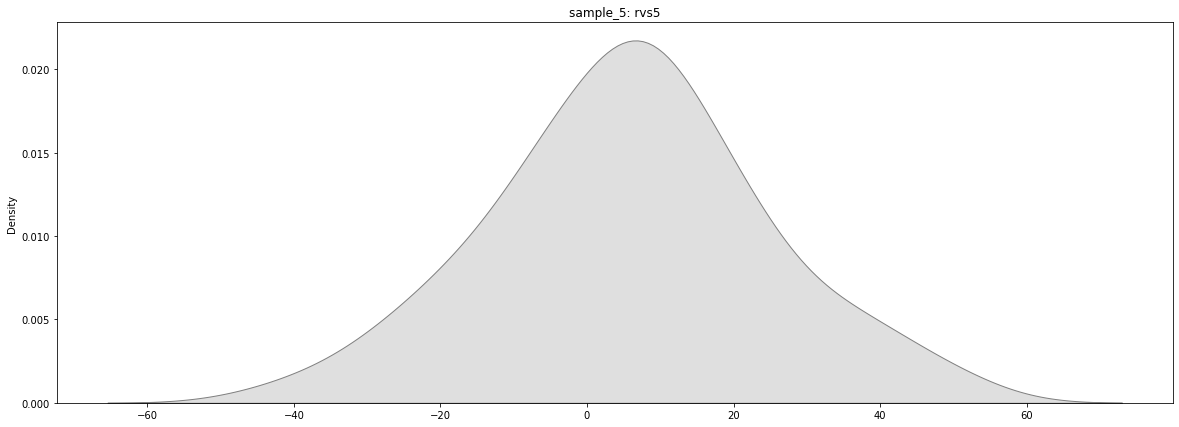

In [45]:
sns.kdeplot(rvs5, color='gray', shade=True)
# give a title of the plot
plt.title("sample_5: rvs5")
# show the plot
plt.show()

In [46]:
# Calculate the T-test for the two samples 'rvs1' and 'rvs5' and with the 'equal_var' parameter as false.
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-0.301415657061282, pvalue=0.763664224642639)

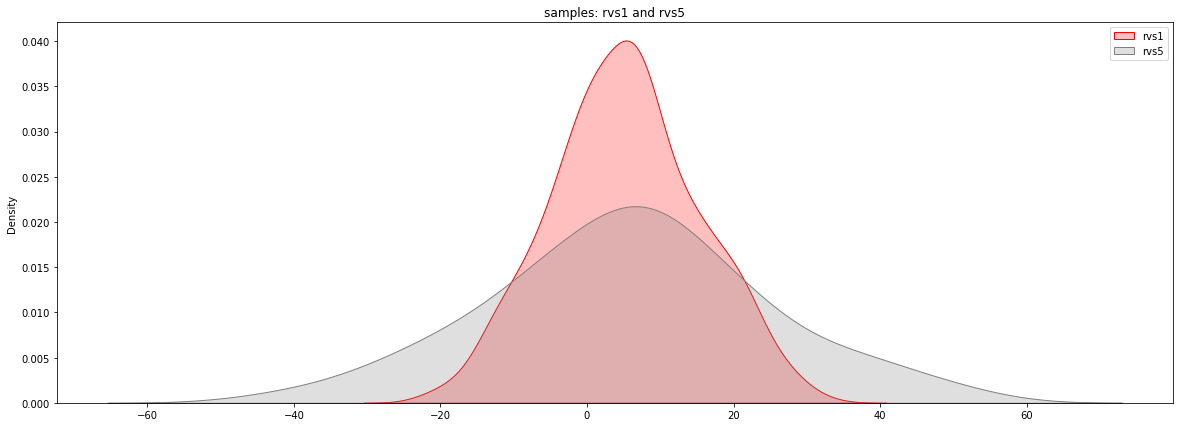

In [47]:
sns.kdeplot(rvs1, color='red', label="rvs1", shade=True)
sns.kdeplot(rvs5, color='gray', label="rvs5", shade=True)
# give a title of the plot
plt.title("samples: rvs1 and rvs5")
# show the legend
plt.legend()
# show the plot
plt.show()

 **Parameter:**

_**permutations**_: non-negative int, np.inf, or None (default), optional
- The parameter `permutations` affects the inferential test but does not alter the test statistic. The parameter `equal_var` affects the test statistic regardless of the `permutations` parameter.

In calculating the inferential test, if `permutations` is specified then the inferential test is based on an empirical bootstrap distribution of potential test statistics that could result from the same data pool but assigned to sample 1 or sample 2 at random. This inferential test does not make strong assumptions about the populations from which the data samples come.

If `permutations` is not specified then the inferential test is based on a theoretical distribution of potential test statistics that could arise if the two data samples come from populations which conform to certain parametric assumptions (normal distribution, and so forth). Slightly different theoretical distributions are used depending on the `equal_var` parameter (because equal_var affects the "degrees of freedom" assumed).$^{[10]}$

In [48]:
# Calculate the T-test for the two samples 'rvs1' and 'rvs5' and with the 'permutations' parameter(10000).
stats.ttest_ind(rvs1, rvs5, permutations=10000,
                random_state=rng)

Ttest_indResult(statistic=-0.4461432941059335, pvalue=0.6601)

In [49]:
# Calculate the T-test for the two samples 'rvs1' and 'rvs5' and with different 'permutations' parameter(100).
stats.ttest_ind(rvs1, rvs5, permutations=100,
                random_state=rng)

Ttest_indResult(statistic=-0.4461432941059335, pvalue=0.65)

So the `permutations` parameter does not change the `statistic` value but `pvalue` has changed. 

In [50]:
# Create two samples, one of which has an extreme tail
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

 **Parameter:**

_**trim**_: float, optional
- The Trim means t-test can often address departures from normality, especially those due to the presence of outliers. We describe the two-sample version of the trimmed means t-test $^{[11]}$.

In [51]:
# Calculate the T-test for the two samples 'a' and 'b' and with the trim parameter.
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)

In [52]:
# Calculate the T-test with the trim parameter as .3 .
stats.ttest_ind(a, b, trim=.3)

Ttest_indResult(statistic=2.832256715395378, pvalue=0.04723681941400341)

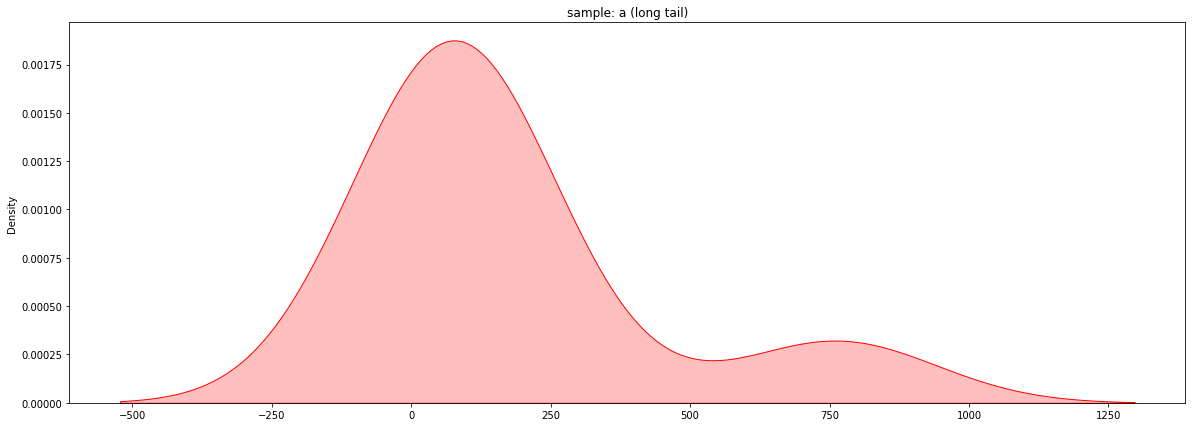

In [53]:
sns.kdeplot(a, color='red', shade=True)
# give a title of the plot
plt.title("sample: a (long tail)")
# show the plot
plt.show()

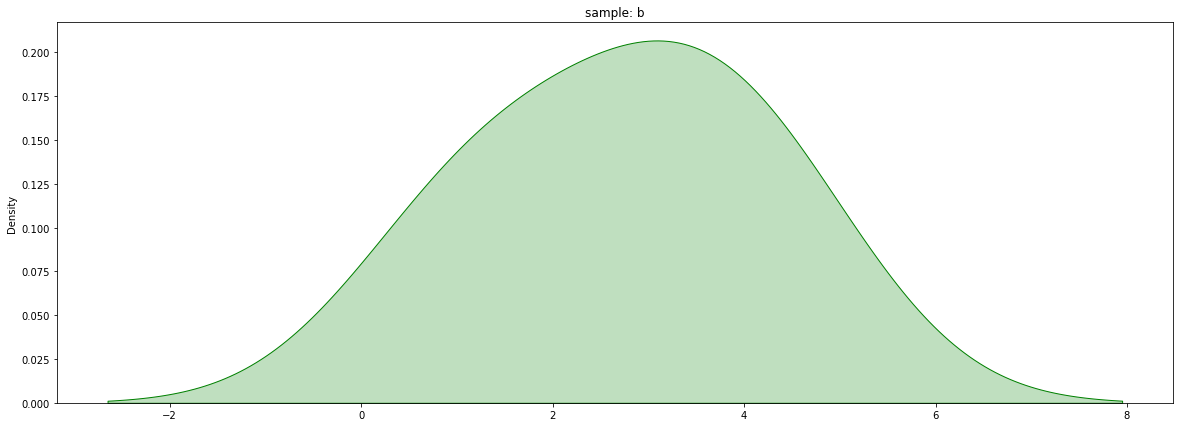

In [54]:
sns.kdeplot(b, color='green', shade=True)
# give a title of the plot
plt.title("sample: b")
# show the plot
plt.show()

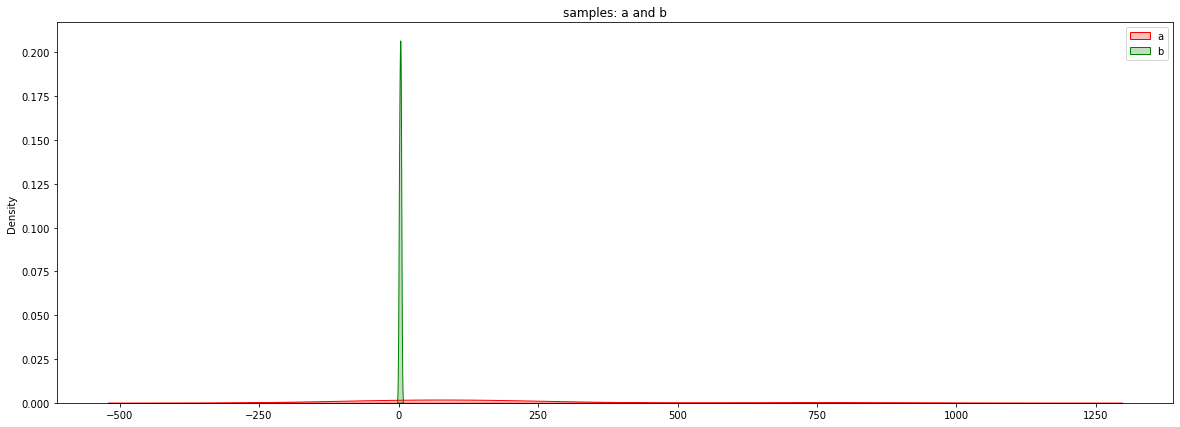

In [55]:
sns.kdeplot(a, color='red', label="a", shade=True)
sns.kdeplot(b, color='green', label="b", shade=True)
# give a title of the plot
plt.title("samples: a and b")
# show the legend
plt.legend()
# show the plot
plt.show()

## References<a class="anchor" id="References"></a>
***


[1] https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/#:~:text=The%20probability%20can%20be%20calculated%20as%3A&text=Thus%2C%20if%20the%20lady%20is,%2C%20i.e.%2C%20about%2024%25.

[2] https://www.w3schools.com/python/ref_math_comb.asp#:~:text=The%20math.,method%20must%20be%20positive%20integers / https://docs.python.org/3/library/math.html 

[3] https://stackoverflow.com/a/4941932

[4] https://docs.scipy.org/doc/scipy/reference/stats.html

[5] https://numpy.org/doc/stable/reference/random/generator.html

[6] https://stackoverflow.com/a/44452737

[7] https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html

[8] https://www.statisticshowto.com/probability-and-statistics/t-test/#:~:text=Every%20t%2Dvalue%20has%20a,did%20not%20occur%20by%20chance

[9] http://pytolearn.csd.auth.gr/d1-hyptest/11/norm-distro.html

[10] https://www.anycodings.com/1questions/202410/scipy-ttestind-permutation-test-changed-by-equalvar-parameter

[11] https://www.real-statistics.com/students-t-distribution/problems-data-t-tests/trimmed-means-t-test/

[12] https://seaborn.pydata.org/tutorial/introduction

[13] https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

### End